## MO444 Project 1 - Unsupervised Learning

* Felipe Marinho Tavares - RA: 265680
* Rodrigo Araújo Marinho Franco - RA: 233569

The goal of this project was to solve clustering and dimensionality reduction tasks. The unsupervised learning algorithms K-means and DBSCAN was used to solve the clustering task, and as predetermined in the project specification, PCA was used for dimensionality reduction task.

Two datasets were used, [cluster.dat](./data/cluster.dat) a simple dataset with only two features, and [EEG: Simon Conflict in Parkison's](https://openneuro.org/datasets/ds003509/versions/1.1.0). Since cluster.dat already have a low dimensionality, PCA was applied only in EEG: Simon Conflict in Parkison's dataset.

### Contributions:
* Rodrigo
 * Report and implementation of min-max feature scaling, K-means, elbow method and silhouette analysis.
 * Report and analysis/spliting of cluster.dat dataset
 * Report and Training of cluster.dat using K-means.
* Felipe
 * DBSCAN implementation
 * Finding and preparing to use EEG: Simon Conflict in Parkison's dataset
 * ...

In [1]:
import os

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
sns.set()

In [2]:
dataset_path = os.path.join("data", "cluster.dat")

## Utility functions

In [3]:
def get_range(data, feature=0):
    return [min(data[:, feature]), max(data[:, feature])]

def plot_data(data, plot_title="Scatter plot"):
    plt.figure(figsize=(12, 8))
    plt.title(plot_title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.scatter(data[:, 0], data[:, 1])
    plt.show()

def plot_data_with_labels(data, clusters_center, labels, plot_title="Scatter plot"):
    plt.figure(figsize=(12, 8))
    plt.title(plot_title)
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')

    c1_points = np.where(labels == 0)
    c2_points = np.where(labels == 1)
    c3_points = np.where(labels == 2)

    plt.scatter(data[c1_points, 0], data[c1_points, 1], color="red")
    plt.scatter(data[c2_points, 0], data[c2_points, 1], color="blue")
    plt.scatter(data[c3_points, 0], data[c3_points, 1], color="green")
    plt.scatter(clusters_center[:, 0], clusters_center[:, 1], marker='x', color='black', s=100)
    plt.show()

## Loading and analyzing cluster.dat dataset

In this cell, the dataset is loaded and a simple analysis of the dataset is done, in order to analyze things like:
- The number of datapoints in the dataset
- The number of features in a datapoint from the dataset;
- An example of datapoint
- The range of the values of each feature
- The way the data is distributed

Number of samples in the dataset: 573
Number of features per sample: 2
Shape of the dataset: (573, 2)
Example of data: [1555.     28.65] <class 'numpy.ndarray'>

Range feature 0: [335.0, 3635.0]
Range feature 1: [1.95, 29.15]
Features data type:  <class 'numpy.float64'>


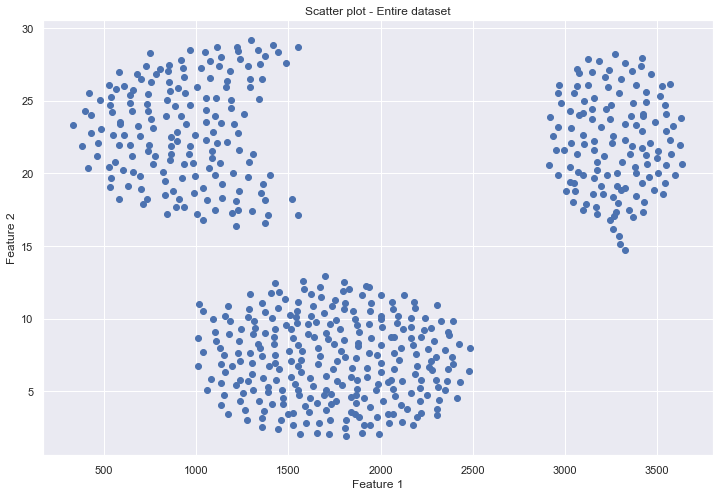

In [4]:
data = np.genfromtxt(dataset_path, delimiter=' ')

range_f0 = get_range(data, feature=0)
range_f1 = get_range(data, feature=1)

print("Number of samples in the dataset:", data.shape[0])
print("Number of features per sample:", data.shape[1])
print("Shape of the dataset:", data.shape)
print("Example of data: {} {}".format(data[0], type(data[0])))

print()
print("Range feature 0: {}".format(range_f0))
print("Range feature 1: {}".format(range_f1))
print("Features data type: ", type(data[0][0]))

plot_data(data, plot_title="Scatter plot - Entire dataset")

From the analysis of the cell above, there is 3 clusters very well defined by the two features of the dataset, futhermore it's possible to see that the range of the values of the features is very different, which indicates that if a normalization of the data is not done, probably the clusters found by the algorithms will not be the expected.

## Dataset splitting and analysis of train and test set 

Spliting the dataset into training and test set, with respectively 90% and 10% of the data in each set.

* The **training set** is used to train k-means and DBSCAN to define the clusters.
* The **test set** is used to evaluate the performance of the algorithm.

In addition to the split of the dataset, this cell makes a simple analysis of each set, like what was done in previous cells.

Training set
Number of samples: 515
Shape: (515, 2)
Range feature 0: [335.0, 3635.0]
Range feature 1: [1.95, 29.15]


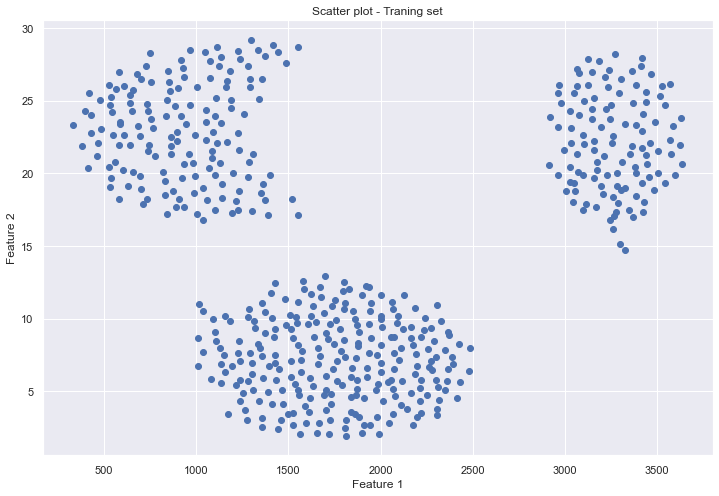


Test set
Number of samples: 58
Shape: (58, 2)
Range feature 0: [655.0, 3550.0]
Range feature 1: [2.85, 28.65]


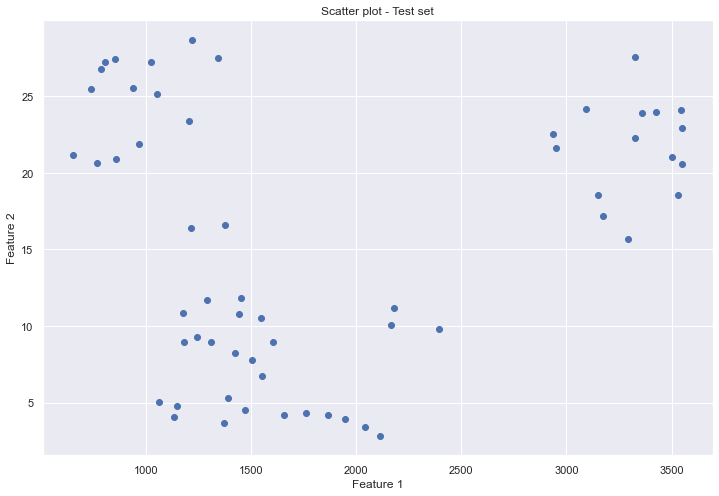

In [5]:
train_data, test_data = train_test_split(data,
                                         test_size=0.10,
                                         random_state=27,
                                         shuffle=True)
print("Training set")
print("Number of samples:", train_data.shape[0])
print("Shape:", train_data.shape)
print("Range feature 0: {}".format(get_range(train_data, feature=0)))
print("Range feature 1: {}".format(get_range(train_data, feature=1)))

plot_data(train_data, "Scatter plot - Traning set")

print("\nTest set")
print("Number of samples:", test_data.shape[0])
print("Shape:", test_data.shape)
print("Range feature 0: {}".format(get_range(test_data, feature=0)))
print("Range feature 1: {}".format(get_range(test_data, feature=1)))

plot_data(test_data, "Scatter plot - Test set")

By looking at the range of the values of the features in each set and the data distribution in the plot, it's possible to observe that both sets represents very well the dataset. In the test set, the mininum value of feature 0 is slightly higher than in the full dataset, but since it is just a small change, it doesn't affect the evaluation of the algorithms.

## Feature scaling - Training set

Feature scaling is used to facilitate the learning of algorithms, in the case of cluster.dat dataset, since the range of the values of the features differ a lot, it is a must have step in order to guarantee that the algorithm will learn correctly.

In this project was used min-max scaling (also known as normalization) in the data. Min-max is applied multiple times to every feature, and it consists in applying the following equation to every value (x) of a feature in a datapoint from a given data set:

![Min max scaling](report_images/min_max_scaling.png)

Where:
* x is the value of the feature for the datapoint
* min(x) is the minimun value of a feature in a data set;
* max(x) is the maximum value of a feature in a data set;

By applying that technique in each feature, the data is normalized, and the new range of the data is [0, 1], helping the training of the algorithm.

In [6]:
for i in range(train_data.shape[1]):
    x_min = min(train_data[:, i])
    x_max = max(train_data[:, i])
    diff = x_max - x_min
    for j in range(train_data.shape[0]):
        train_data[j][i] = (train_data[j][i] - x_min) / diff

range_f0 = get_range(train_data, feature=0)
range_f1 = get_range(train_data, feature=1)

print("Range feature 0 after feature scaling: {}".format(range_f0))
print("Range feature 1 after feature scaling: {}".format(range_f1))
print("Example of data: {} {}".format(train_data[0], type(train_data[0])))

Range feature 0 after feature scaling: [0.0, 1.0]
Range feature 1 after feature scaling: [0.0, 1.0]
Example of data: [0.26666667 0.12683824] <class 'numpy.ndarray'>


## Feature scaling - Test set

In [7]:
for i in range(test_data.shape[1]):
    x_min = min(test_data[:, i])
    x_max = max(test_data[:, i])
    diff = x_max - x_min
    for j in range(test_data.shape[0]):
        test_data[j][i] = (test_data[j][i] - x_min) / diff

range_f0 = get_range(test_data, feature=0)
range_f1 = get_range(test_data, feature=1)

print("Range feature 0 after feature scaling: {}".format(range_f0))
print("Range feature 1 after feature scaling: {}".format(range_f1))
print("Example of data: {} {}".format(test_data[0], type(test_data[0])))

Range feature 0 after feature scaling: [0.0, 1.0]
Range feature 1 after feature scaling: [0.0, 1.0]
Example of data: [0.9343696  0.81589147] <class 'numpy.ndarray'>


## K-means implementation

The cell below implements the unsupervised learning algorithm for clustering K-means. K-means tries to partition the datapoints from the dataset into **k** clusters, in which every datapoint belongs to the nearest cluster. The basic algorithm of k-means is described below:

![K-means algorithm](report_images/kmeans-algorithm.png)

In the implementation of this project, it's possible to define with the parameter `init` how clusters will be initialized, where with:
- random: Initializes clusters center in a random position, taking into account the maximum value of each feature.
- forgy: choose k random datapoints and set clusters center to that position. 
- kmeans++: Use k-means++ algorithm for choosing clusters center as far away as possible.

It's also possible to define two parameters to stop the algorithm from trying to find the optimal centers of cluster:
- tolerance: Defines the mininum change between two iterations in the center of cluster to be considerated as a change, any distance moved below that paramater is not considerated as change, and if that happens, the algorithm stops.
- max_iterations: Defines the maximum number of iterations that the algorithm will try to find optimal clusters center.

Euclidian distance was used to measure the distance between two datapoints. 

In [8]:
class KMeans():
    def __init__(self, n_clusters=3, n_features=2, init="random",
                 max_iterations=300, tolerance=0.0001):
        self.init = init
        self.tolerance = tolerance
        self.n_clusters = n_clusters
        self.n_features = n_features
        self.max_iterations = max_iterations
        
        self.clusters_center = np.zeros((self.n_clusters, self.n_features))

    def init_clusters(self, data, init="random"):        
        if init == "random":
            self.clusters_center = np.random.rand(self.n_clusters, self.n_features)
            for i in range(self.n_features):
                self.clusters_center[:, i] *= np.max(data[:, i])
        elif init == "forgy":
            self.clusters_center = data[np.random.choice(len(data),
                                                         self.n_clusters,
                                                         replace=False)]
        elif init =="kmeans++":
            self.clusters_center = np.ones((self.n_clusters, self.n_features)) * np.Inf
            
            choosen_datapoint_idx = np.random.choice(len(data), 1)[0]
            self.clusters_center[0] = data[choosen_datapoint_idx]
            
            for cluster_id in range(1, self.n_clusters):
                distances = np.ones(data.shape[0]) * np.inf
                for i, datapoint in enumerate(data):
                    for cluster_center in self.clusters_center:
                        distance = self.get_distance(datapoint, cluster_center)
                        if distance < distances[i]:
                            distances[i] = distance

                probabilities = (distances ** 2) /sum(distances ** 2)
                choosen_datapoint_idx = np.random.choice(len(data),
                                                         1, p=probabilities)
                self.clusters_center[cluster_id] = data[choosen_datapoint_idx]

    def get_distance(self, p1, p2):
        return np.sqrt(sum((p1 - p2) ** 2))
    
    def get_distance_point_to_set_points(self, point, set_points):
        distance = 0
        for point_ in set_points:
            distance += self.get_distance(point, point_)
            
        return distance     
    
    def get_diff_pos_cluster(self):
        diff = 0
        
        for cluster, old_cluster in zip(self.clusters_center, self.old_clusters_center):
            diff += self.get_distance(cluster, old_cluster)
        
        return diff

    def assign_datapoints_to_clusters(self, data):
        labels = np.zeros(data.shape[0], dtype=np.int32)
        distances = np.ones(data.shape[0]) * np.inf
        
        for idx, datapoint in enumerate(data):
            for cluster_id, cluster_center in enumerate(self.clusters_center):
                distance = self.get_distance(datapoint, cluster_center)
                if distance < distances[idx]:
                    distances[idx] = distance
                    labels[idx] = cluster_id

        return labels, distances

    def update_clusters_center(self, data):
        self.old_clusters_center = self.clusters_center
        self.clusters_center = np.zeros((self.n_clusters, self.n_features))
        counter = np.zeros(self.n_clusters)
        
        for i in range(len(self.labels)):
            label = self.labels[i]
            counter[label] += 1
            for j in range(self.n_features):
                self.clusters_center[label][j] += data[i][j]
        
        for i in range(self.n_clusters):
            if counter[i] > 0:
                self.clusters_center[i] /= counter[i]
            else:
                self.clusters_center[i] = self.old_clusters_center[i]

    def fit(self, data):
        self.labels = np.zeros(data.shape[0], dtype=np.int32)
        self.distances = np.zeros(data.shape[0], dtype=np.float64)
        self.range_f0 = get_range
        n_iterations = 1
        diff_pos_cluster = np.Inf

        self.init_clusters(data, init=self.init)

        while n_iterations <= self.max_iterations and diff_pos_cluster > self.tolerance:
            self.labels, self.distances = self.assign_datapoints_to_clusters(data)
            self.update_clusters_center(data)
            diff_pos_cluster = self.get_diff_pos_cluster()
            n_iterations += 1
        
        return self.labels, self.clusters_center, n_iterations
    
    def predict(self, data):
        return self.assign_datapoints_to_clusters(data)
    
    def get_sse(self, by_cluster=True):
        # SSE = Sum of Squared error = sum(distances^2)
        sse = np.empty(self.n_clusters)
        for cluster_id in range(len(self.clusters_center)):
            sse[cluster_id] = sum(self.distances[np.where(self.labels == cluster_id)] ** 2)
        
        if by_cluster:
            return sse
        else:
            return sum(sse)
    
    def get_silhouette_coefficient(self, data):
        """ 
            silhouette_datapoint = (a - b)/max(a, b)
            
            where:
              - a: The mean distance between a sample and all other points in the 
              same cluster.
              - b: The mean distance between a sample and all other points in the
              next nearest cluster.
              
            -1 <= silhouette_datapoint <= 1
        """
        silhouette_coeff = np.zeros(data.shape[0])
        
        datapoints_per_cluster = []
        for cluster_id in range(self.n_clusters):
            datapoints_per_cluster.append(data[np.where(self.labels == cluster_id)])
        
        for i, datapoint in enumerate(data):
            label = self.labels[i]
            
            datapoints_cluster = datapoints_per_cluster[label]
            a = self.get_distance_point_to_set_points(datapoint, datapoints_cluster)
            
            nearest_cluster_id = 0
            nearest_cluster_distance = np.inf
            for cluster_id, cluster_center in enumerate(self.clusters_center):
                if cluster_id == label:
                    continue
                distance = self.get_distance(datapoint, cluster_center)
                if distance < nearest_cluster_distance:
                    nearest_cluster_distance = distance
                    nearest_cluster_id = cluster_id
            
            datapoints_nearest_cluster = datapoints_per_cluster[nearest_cluster_id]
            b = self.get_distance_point_to_set_points(datapoint, datapoints_nearest_cluster)
            
            silhouette_coeff[i] = (b - a)/max(a, b)
            
            assert silhouette_coeff[i] >= -1 and silhouette_coeff[i] <= 1
        
        avg_silhouette_coeff = np.average(silhouette_coeff)
        
        return silhouette_coeff, avg_silhouette_coeff

## Finding the optimal number of clusters (k)

In order to find the optimal number of clusters (k), were used the Elbow method and Silhouette analysis. 

In the case of datasets like cluster.dat, it is easy to find the best number of cluster, just by looking at the plot of the data distribution it's possible to see that data can be divided in 3 clusters, but when using datasets with more data and features, usually it's harder to find the best number of cluster, that's why those techniques are usefull.

### Elbow method

The elbow method is a heuristic used to determine the optimal number of clusters in a dataset. The method consists of plotting the sum of squared distance (SSE) as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

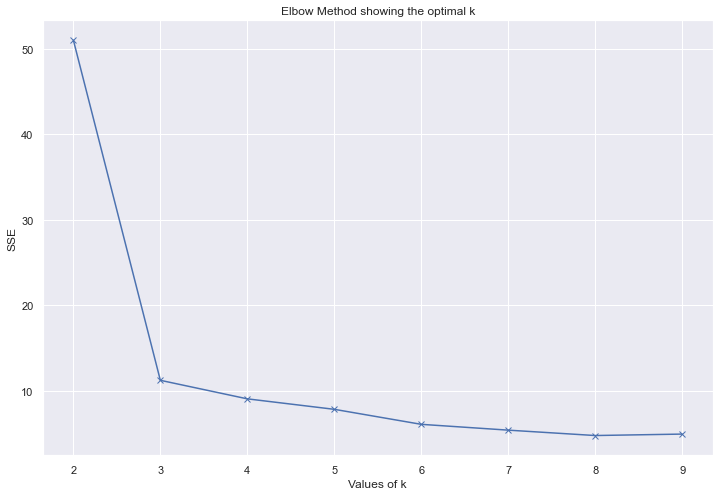

In [9]:
sse = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, init="kmeans++")
    labels_train, clusters_center, n_iterations = kmeans.fit(train_data)

    sse.append(kmeans.get_sse(by_cluster=False))

plt.figure(figsize=(12, 8))
plt.xlabel("Values of k")
plt.ylabel("SSE")
plt.title("Elbow Method showing the optimal k")
plt.plot(K, sse, "bx-")
plt.show()

As can be seen in the previous cell, the elbow of the curve appears at k = 3, so the optimal number of cluster for cluster.dat dataset, as we already know before by the data distribution plot, is 3.

### Silhouette analysis

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). This measure has a range of [-1, 1] and like Elbow method, can be used to determine visually the best number of clusters.

![Cohesion and Separation](report_images/cohesion_separation.png)

The Silhouette Coefficient for a single sample is given as:

![Silhouette Coefficient](report_images/silhouette_coefficient.png)

Where:
- **a** is the mean distance between a sample and all other points in the same cluster
- **b** is the mean distance between a sample and all other points in the next nearest cluster

The Silhouette value is obtained by taking the average of the Silhouette Coefficient of each sample in a data set.

A high Silhouette value indicates that the number of clusters is appropriate, and a low value indicates that it may have too many or too few clusters. 

For k = 2 The average silhouette_score is : 0.48710762726432905
For k = 3 The average silhouette_score is : 0.6270001561522708
For k = 4 The average silhouette_score is : 0.5105619671884177
For k = 5 The average silhouette_score is : 0.45304273784820087
For k = 6 The average silhouette_score is : 0.44581606802142
For k = 7 The average silhouette_score is : 0.40842819560752114
For k = 8 The average silhouette_score is : 0.34002977734783374
For k = 9 The average silhouette_score is : 0.3262122201912783


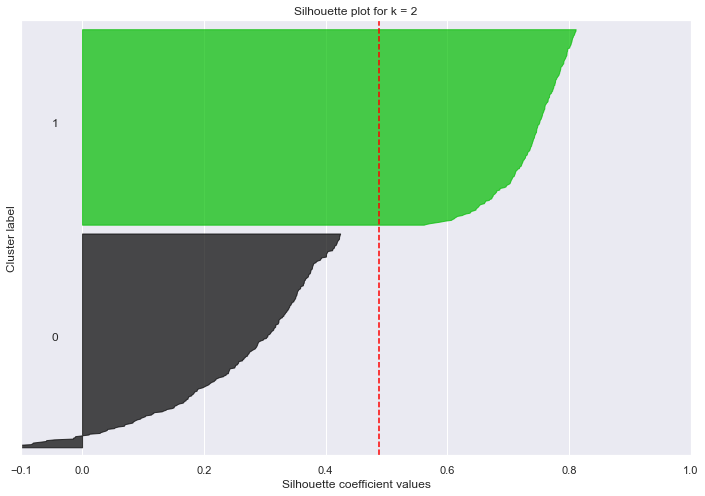

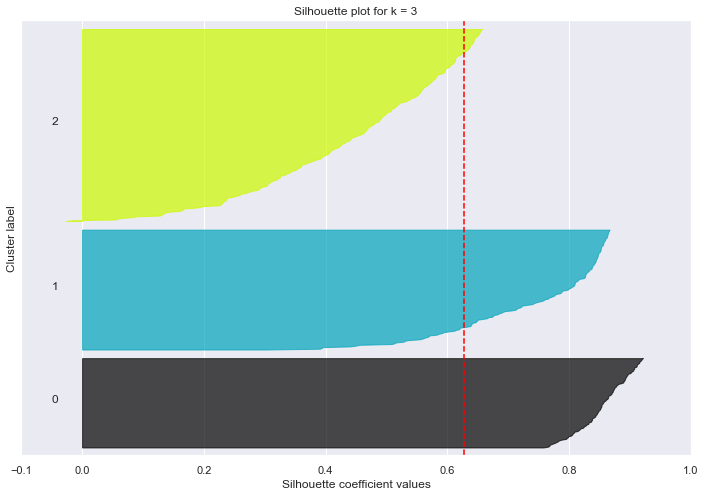

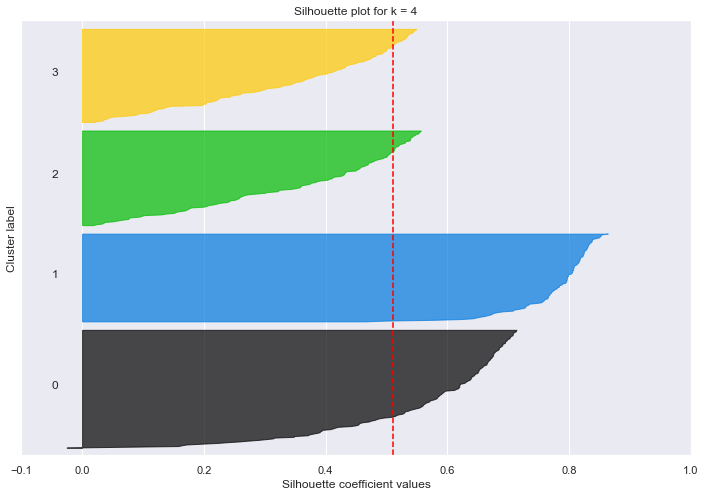

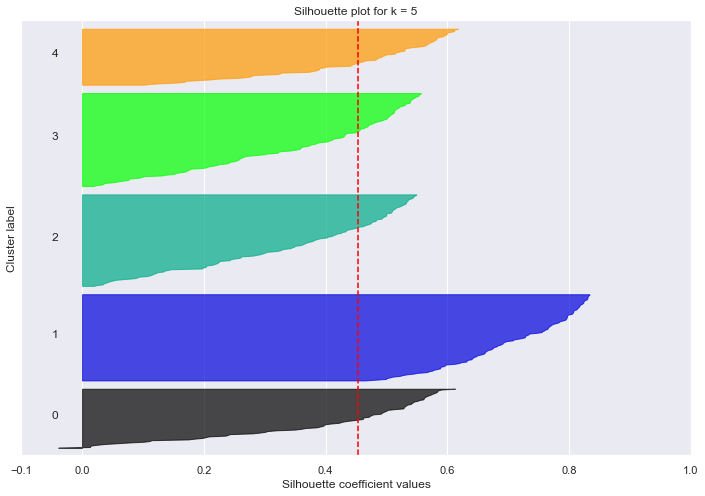

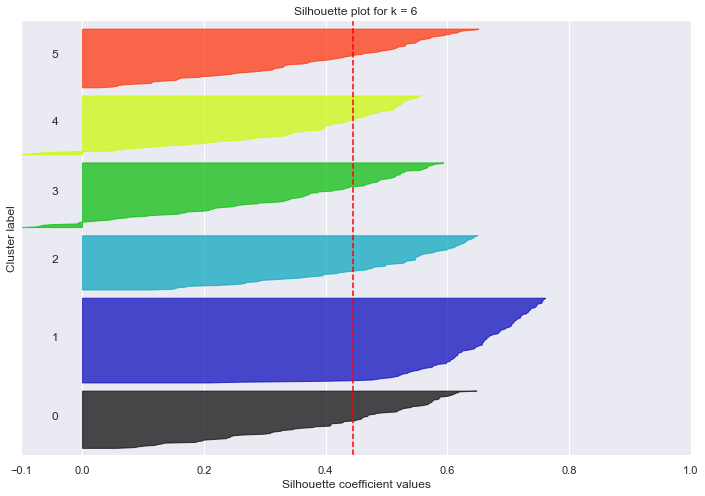

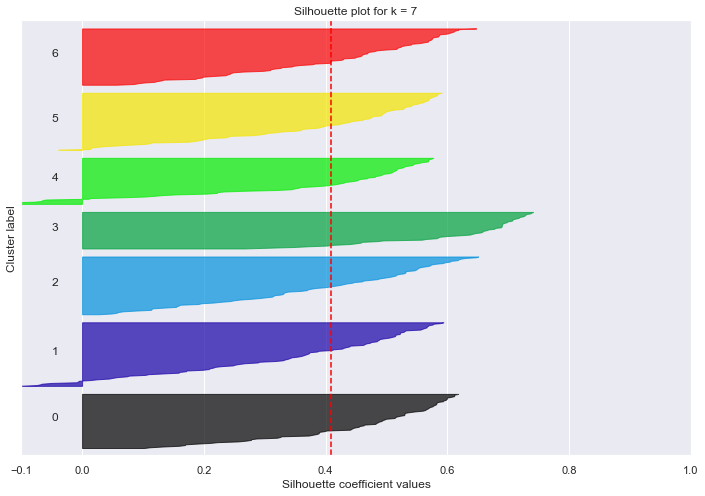

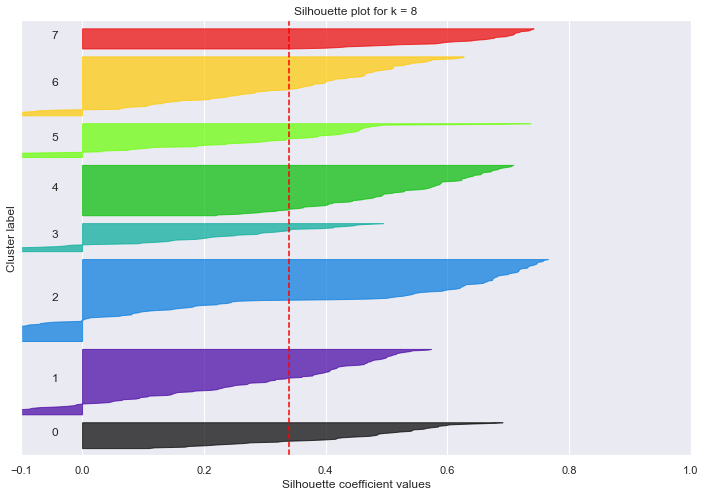

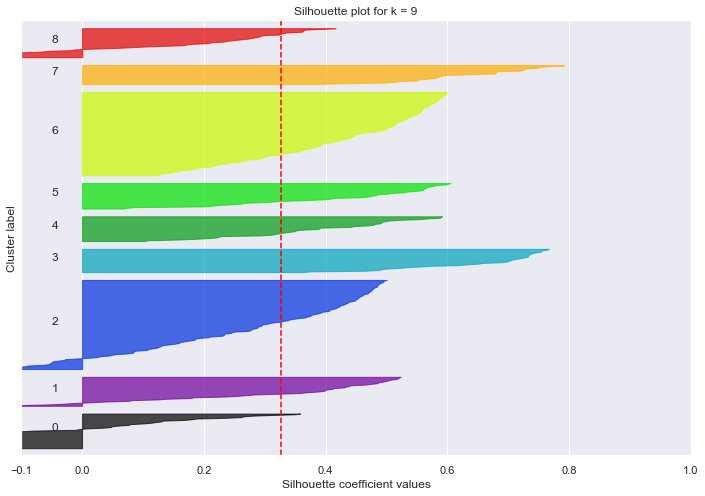

In [10]:
# Code adapted from: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

import matplotlib.cm as cm

K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, init="kmeans++")
    labels_train, clusters_center, n_iterations = kmeans.fit(train_data)

    silhouette_coeff, avg_silhouette_coeff = kmeans.get_silhouette_coefficient(train_data)
    
    plt.figure(figsize=(12, 8))
    ax = plt.gca()
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(train_data) + (k + 1) * 10])
    
    print("For k =",  k,
          "The average silhouette_score is :", avg_silhouette_coeff)
    
    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = \
            silhouette_coeff[labels_train == i]
        
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10
        
    ax.set_title("Silhouette plot for k = {}".format(k))
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster label")
    
    ax.axvline(x=avg_silhouette_coeff, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    

plt.show()

As can be seen in the previous cell, the higher silhouett value (0.6270001561522708) was obtained when using 3 clusters, so the optimal number of clusters is 3, as we already know by the elbow method and by analyzing the dataset.

## Training the algorithm

K-means usually took 4-5 iterations to find the optimal centers for clusters on cluster.dat dataset, using a tolerance of 0.0001 and k-means++ to initialize the centers of the clusters. Usually when using a random initialization, the algorithm needs more iterations (~7) to converge to a solution. 

In [11]:
kmeans = KMeans(n_clusters=3, init="kmeans++")
labels_train, clusters_center, n_iterations = kmeans.fit(train_data)

print("Executed {} iterations".format(n_iterations))
print("Clusters center")
for i, cluster in enumerate(clusters_center):
    print("C{:}: {:}".format(i, cluster))

Executed 4 iterations
Clusters center
C0: [0.18074577 0.76860915]
C1: [0.43205223 0.19200592]
C2: [0.88769433 0.74000959]


<Figure size 864x576 with 0 Axes>

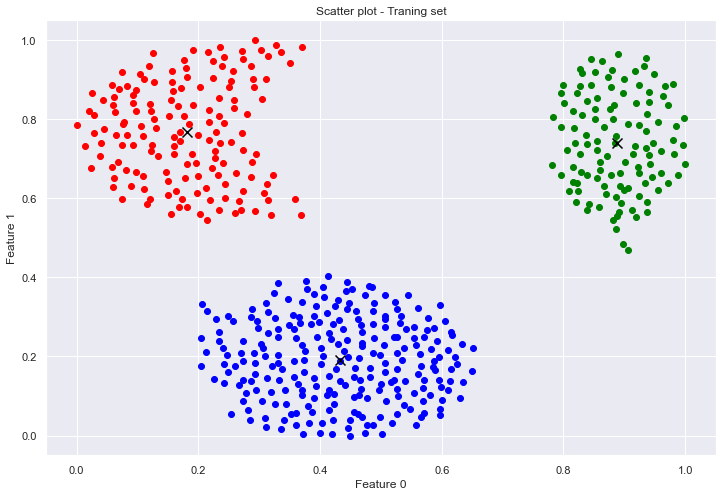

In [12]:
plt.figure(figsize=(12, 8))

plot_data_with_labels(train_data, clusters_center, labels_train, plot_title="Scatter plot - Traning set")

As we can see in the scatter plot, the algorithm correctly labeled all the datapoints in the train set and the center of the clusters is very well placed in the center of each set of of datapoints.

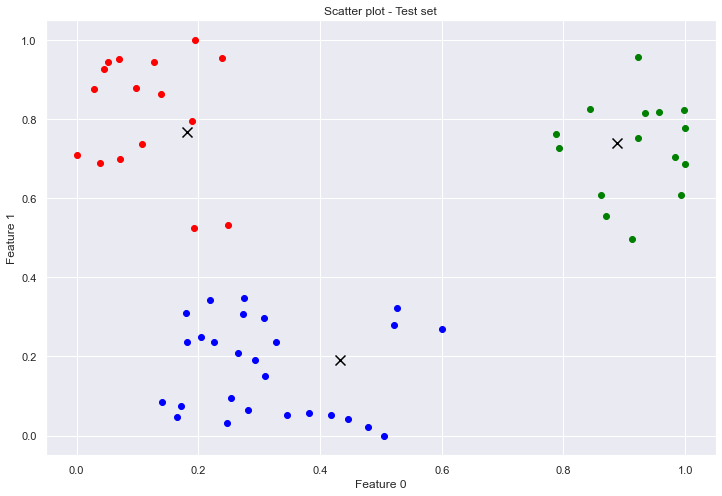

In [13]:
labels_test, _ = kmeans.predict(test_data)
plot_data_with_labels(test_data, clusters_center, labels_test, plot_title="Scatter plot - Test set")

As we can see in the scatter plot, like what happened with the train set, the algorithm correctly labeled all the datapoints in the test set, even though it seems that the center of some clusters is not well positioned.